## O problemu

## Priprema i preobrada podataka

### Importovanje biblioteka

In [1149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

### Ucitavanje podataka

In [1150]:
import pandas as pd

df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (5630, 20)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

### Informacije o podacima

In [1151]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [1152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

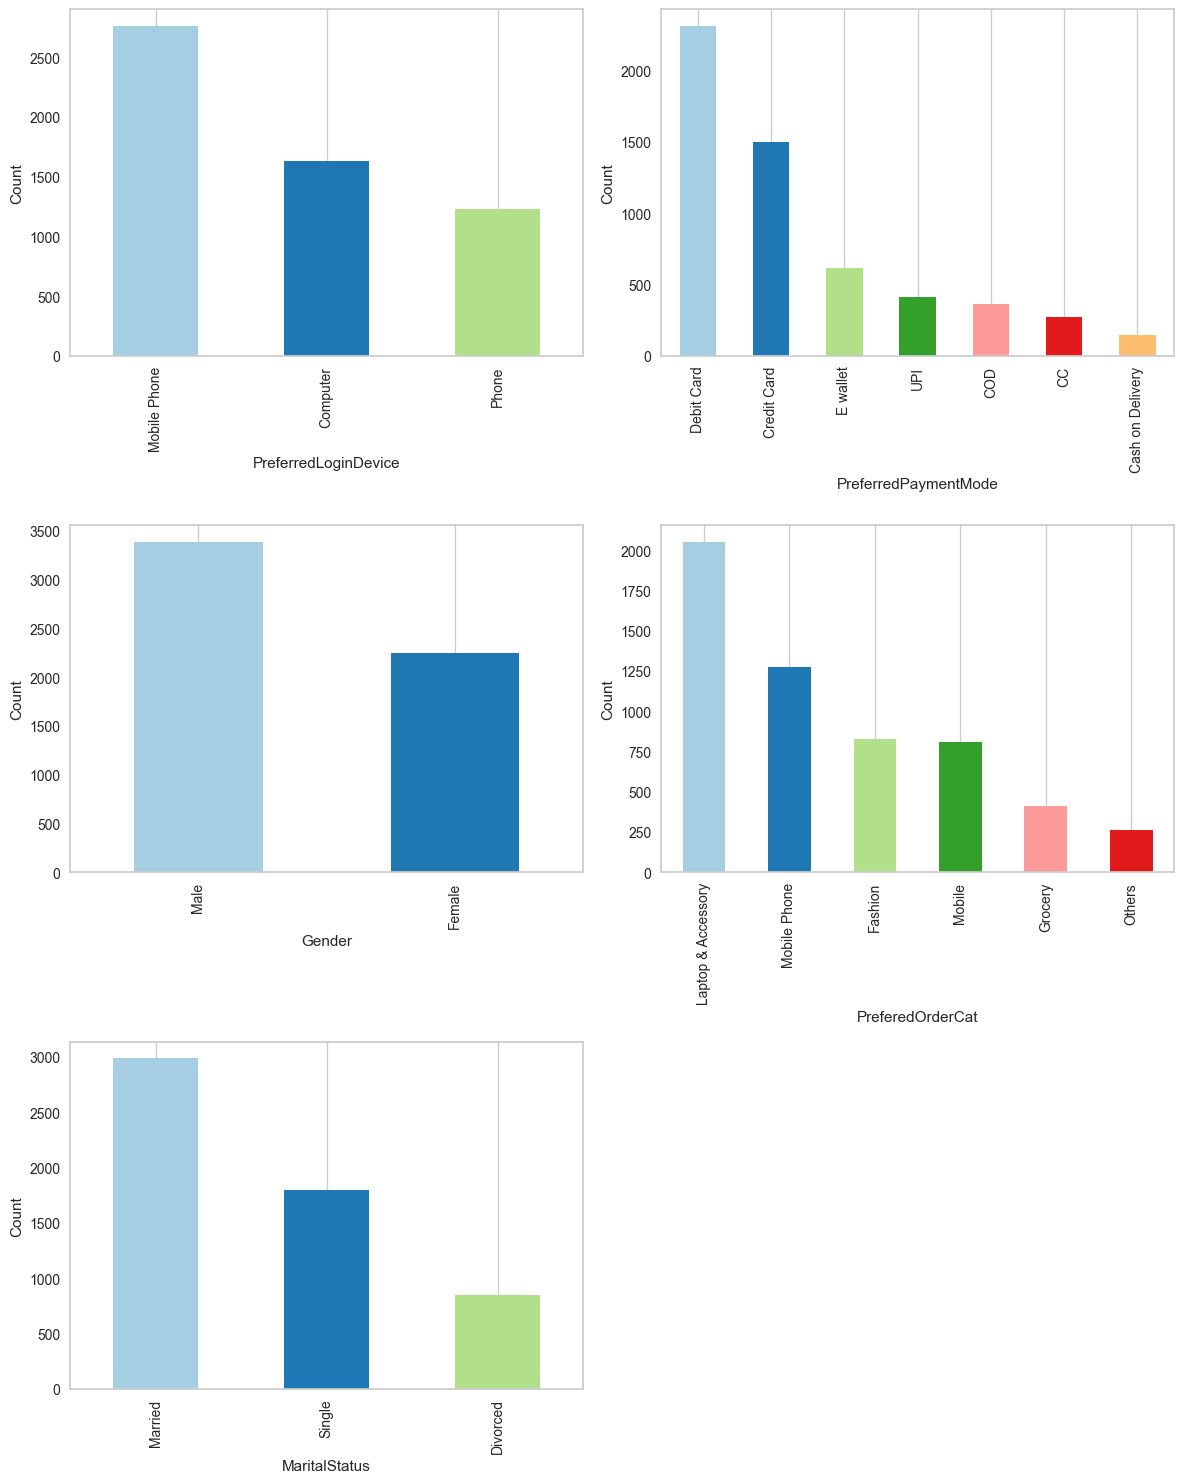

In [1153]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))


for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors)

    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

In [1154]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

### Detekcija duplikata

In [1155]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())


Broj duplikata: 0


### Tretman nedostajućih vrednosti

In [1156]:
# Procenat nedostajućih vrednosti u svakoj koloni
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

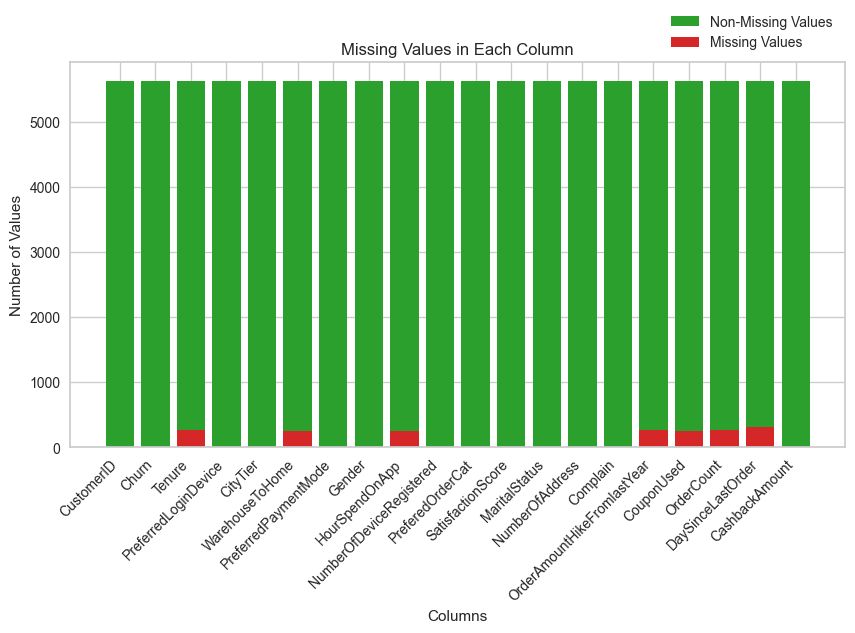

In [1157]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

Sve nedostajuće vrednosti zauzimaju mali udeo u kolonama (manje od 6%), stoga ih možemo popuniti.

In [1158]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')
df['Tenure'].isnull().sum()

0

In [1159]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))
df['WarehouseToHome'].isnull().sum()

0

In [1160]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
df['HourSpendOnApp'].isnull().sum()

0

In [1161]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

In [1162]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])
df['CouponUsed'].isnull().sum()

0

In [1163]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
df['OrderCount'].isnull().sum()

0

In [1164]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')
df['DaySinceLastOrder'].isnull().sum()

0

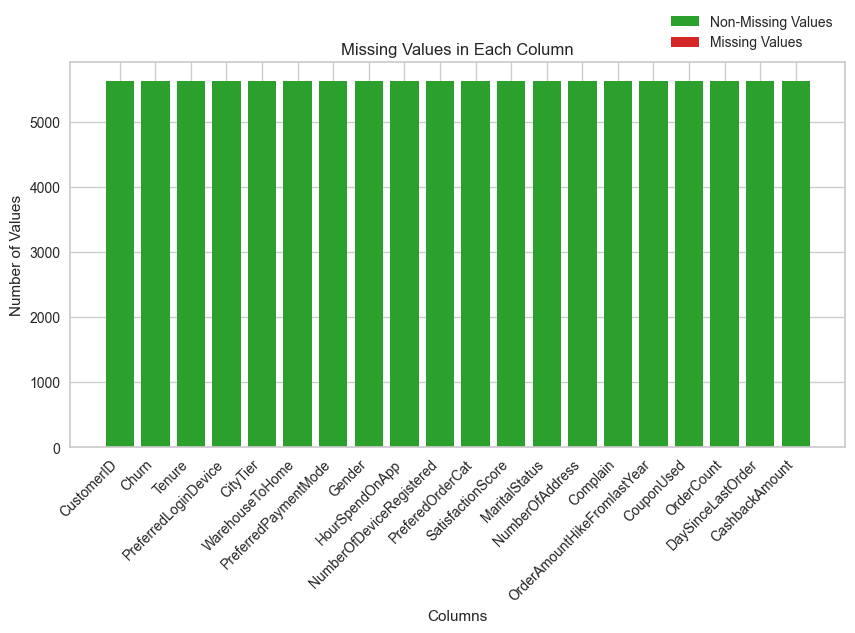

In [1165]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

### Izbacivanje CustomerID kolone

In [1166]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

### Kodiranje kategoričkih fičera

In [1167]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [1168]:
le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     2         3             11.0   
7      1    13.0                     2         1              6.0   
8      1    13.0                     2         3              9.0   
9      1     4.0                     2         1             31.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             2.0                         3   
5                     4       0             3.0                         5   
6                     2       1             2.0                         3   
7                     0       1             3.0                         3   
8                     5       1             2.0                         4   
9                     4       1             2.0                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 4                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

In [1169]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     2         3             11.0   
7      1    13.0                     2         1              6.0   
8      1    13.0                     2         3              9.0   
9      1     4.0                     2         1             31.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             2.0                         3   
5                     4       0             3.0                         5   
6                     2       1             2.0                         3   
7                     0       1             3.0                         3   
8                     5       1             2.0                         4   
9                     4       1             2.0                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 4                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

In [1028]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### Outliers

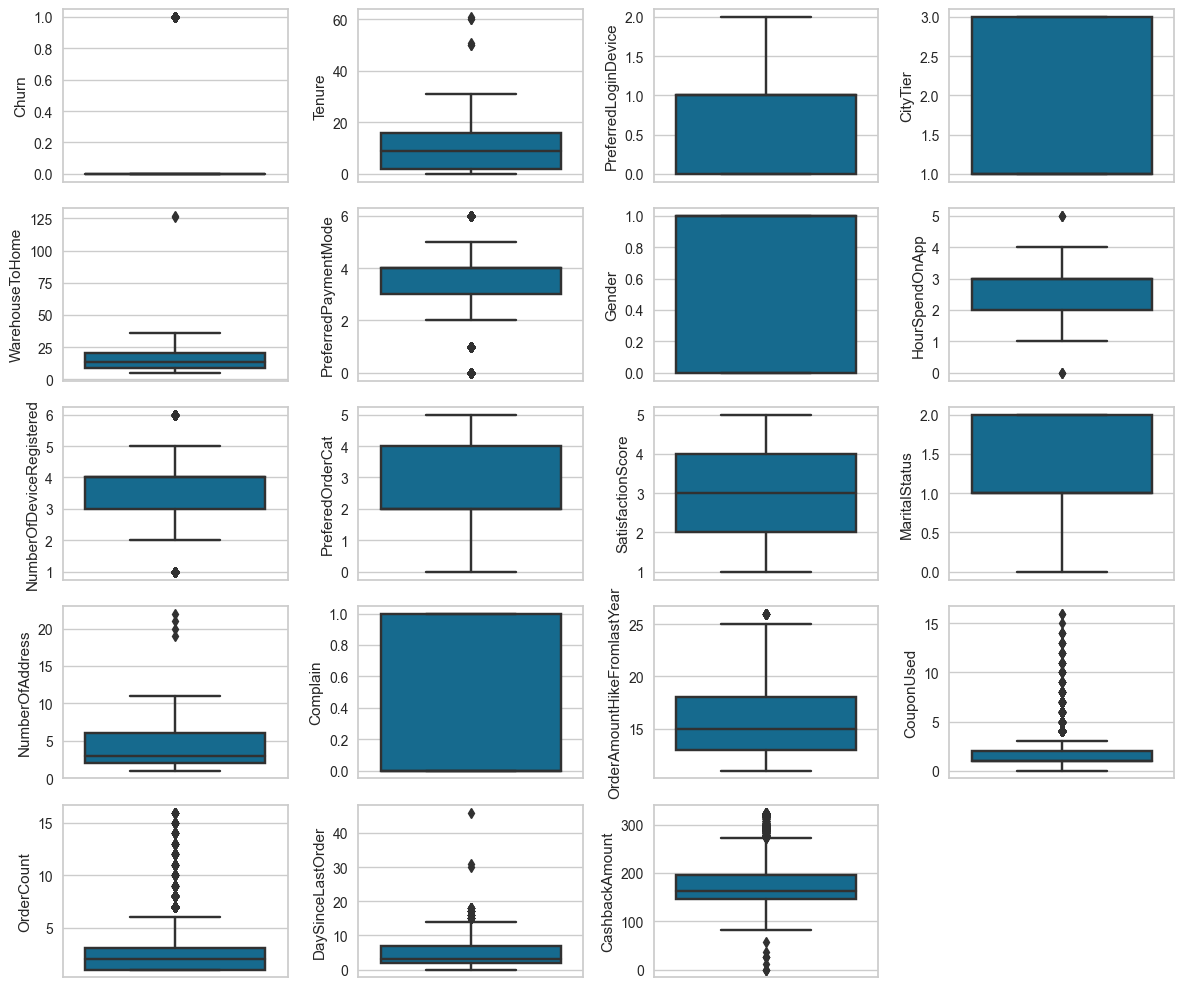

In [1029]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

IRQ metod

In [1030]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [1031]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07

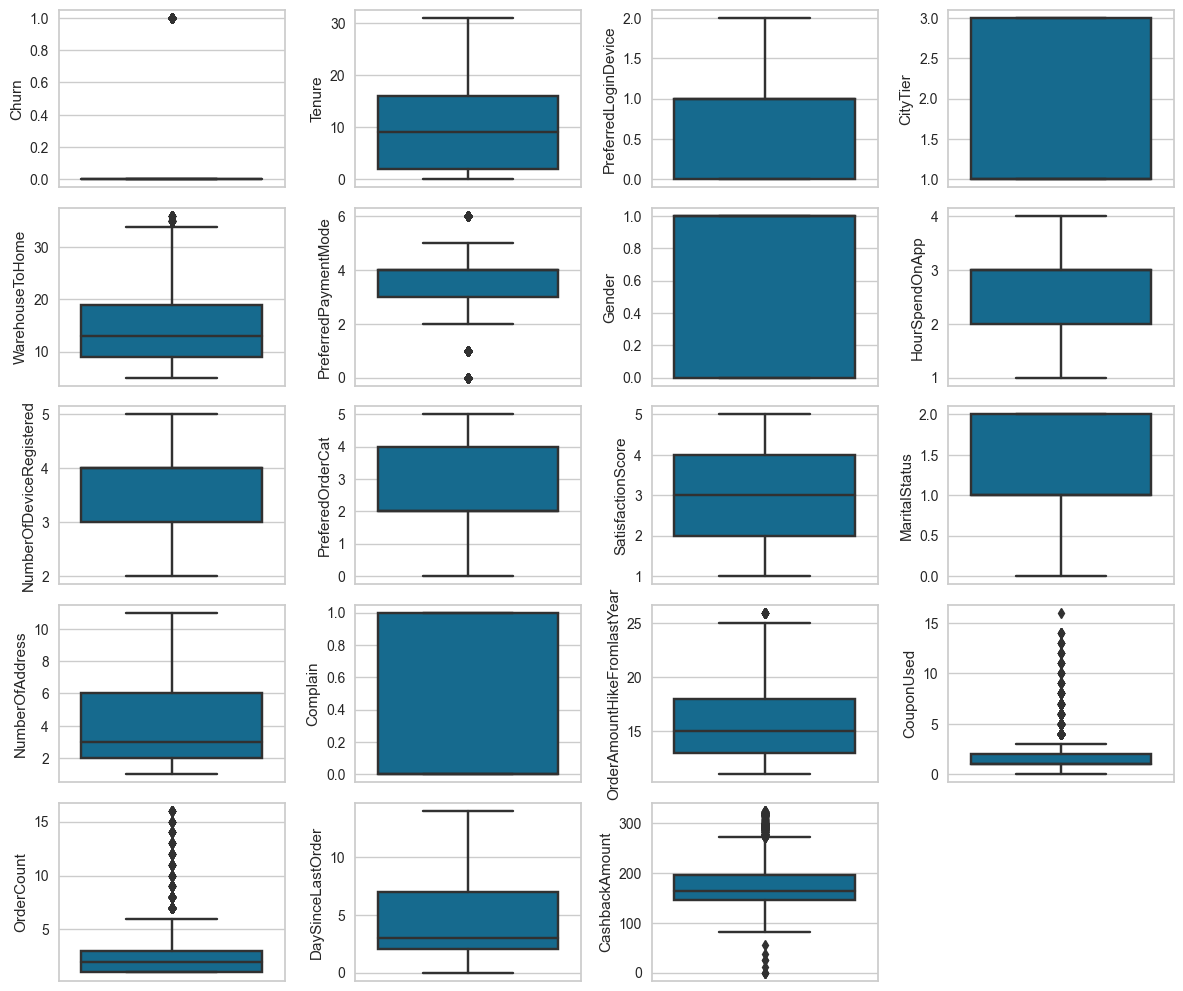

In [1032]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [1033]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                        1.000000 -0.336058              0.027574   
Tenure                      -0.336058  1.000000             -0.081204   
PreferredLoginDevice         0.027574 -0.081204              1.000000   
CityTier                     0.069595 -0.065933             -0.063092   
WarehouseToHome              0.054768 -0.011849             -0.052052   
PreferredPaymentMode        -0.037398  0.041412             -0.072458   
Gender                       0.038193 -0.054684              0.010152   
HourSpendOnApp              -0.002359 -0.012663             -0.075527   
NumberOfDeviceRegistered     0.079116 -0.019592             -0.082608   
PreferedOrderCat             0.115604 -0.169986              0.163990   
SatisfactionScore            0.108600 -0.013331              0.052788   
MaritalStatus                0.131982 -0.111074              0.003466   
NumberOfAddress              0.033703  0.240939             -0.052607   
Complain                     0.252346 -0.023903              0.007016   
OrderAmountHikeFromlastYear -0.002545  0.017177             -0.013655   
CouponUsed                  -0.017914  0.127314             -0.109824   
OrderCount                  -0.036568  0.181138             -0.122282   
DaySinceLastOrder           -0.164448  0.164444             -0.146917   
CashbackAmount              -0.165008  0.453981             -0.232013   

                             CityTier  WarehouseToHome  PreferredPaymentMode  \
Churn                        0.069595         0.054768             -0.037398   
Tenure                      -0.065933        -0.011849              0.041412   
PreferredLoginDevice        -0.063092        -0.052052             -0.072458   
CityTier                     1.000000         0.014636              0.238241   
WarehouseToHome              0.014636         1.000000              0.038004   
PreferredPaymentMode         0.238241         0.038004              1.000000   
Gender                      -0.022759        -0.015904              0.001378   
HourSpendOnApp              -0.010045         0.082865              0.043327   
NumberOfDeviceRegistered     0.007282         0.029049              0.061301   
PreferedOrderCat            -0.190314        -0.104242             -0.091362   
SatisfactionScore           -0.009735         0.013783             -0.019142   
MaritalStatus                0.002254        -0.028226             -0.028367   
NumberOfAddress             -0.033363         0.001173              0.040292   
Complain                     0.006312         0.022052              0.023704   
OrderAmountHikeFromlastYear -0.022135         0.028927              0.021512   
CouponUsed                   0.017139         0.013175              0.049944   
OrderCount                   0.035656         0.016235              0.024606   
DaySinceLastOrder            0.023394         0.044883              0.054237   
CashbackAmount               0.044946         0.036318              0.157898   

                               Gender  HourSpendOnApp  \
Churn                        0.038193       -0.002359   
Tenure                      -0.054684       -0.012663   
PreferredLoginDevice         0.010152       -0.075527   
CityTier                    -0.022759       -0.010045   
WarehouseToHome             -0.015904        0.082865   
PreferredPaymentMode         0.001378        0.043327   
Gender                       1.000000       -0.011128   
HourSpendOnApp              -0.011128        1.000000   
NumberOfDeviceRegistered    -0.020954        0.270563   
PreferedOrderCat             0.066026        0.086794   
SatisfactionScore           -0.037348        0.027763   
MaritalStatus               -0.019975       -0.044056   
NumberOfAddress             -0.030577        0.139723   
Complain                    -0.030350        0.000175   
OrderAmountHikeFromlastYear -0.007694        0.104507   
CouponUsed                  -0.026477        0.181166   
O

<AxesSubplot: >

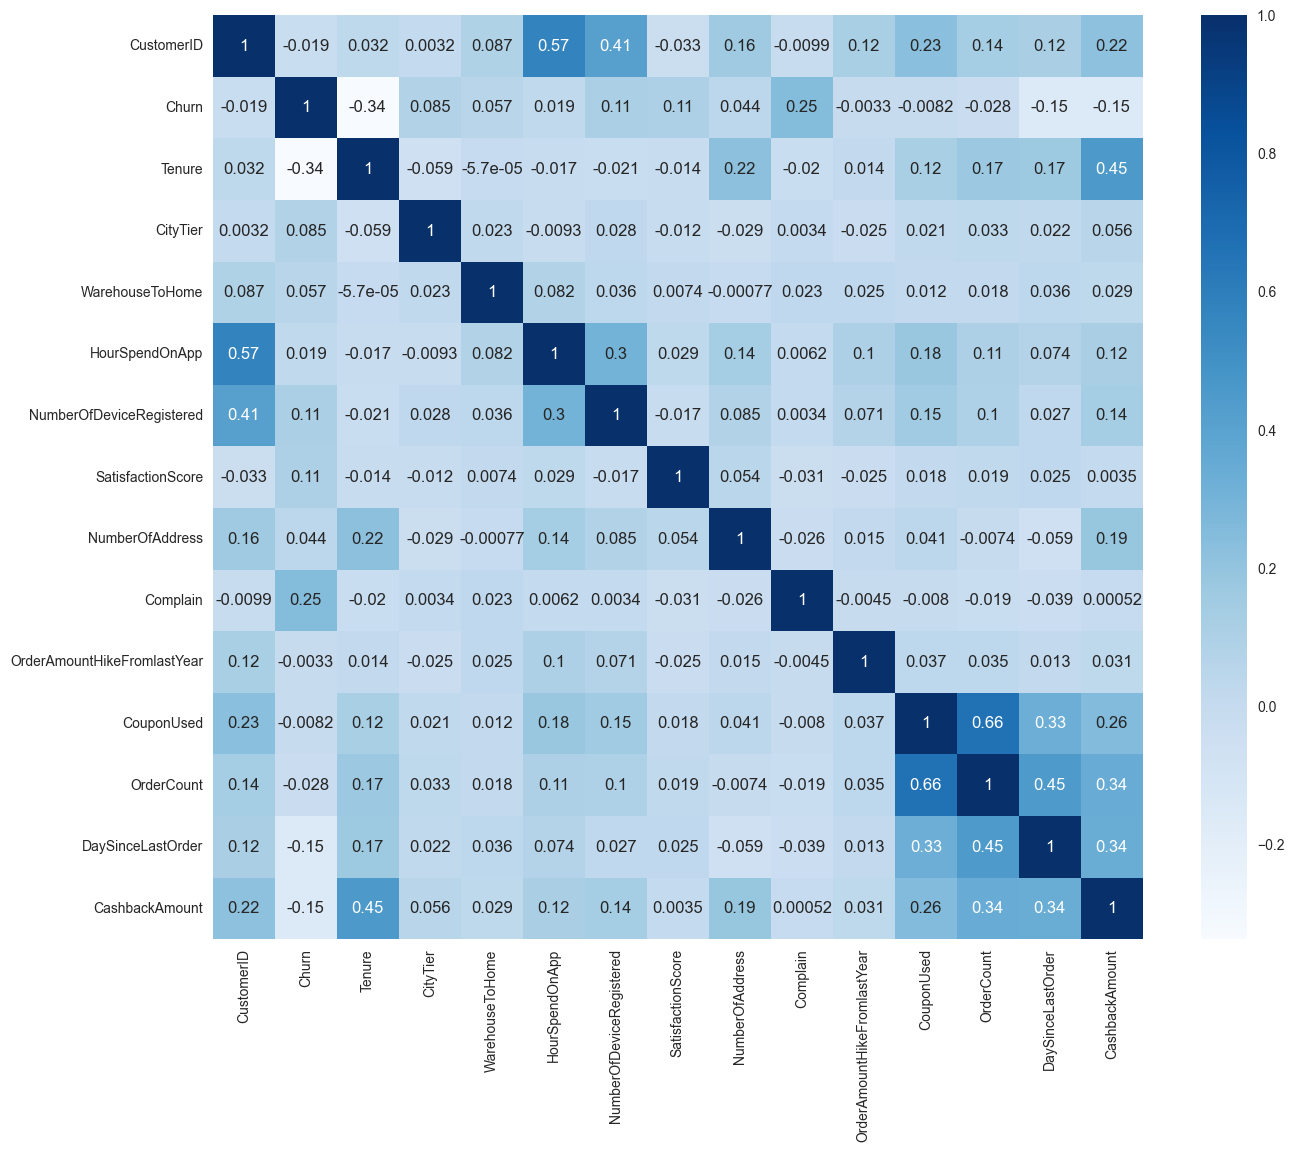

In [1138]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

## Klasterizacija

### Skaliranje

In [1035]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df.describe()

### Procena optimalnog broja klastera

In [1036]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def elbowDist(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12))
    elbow.fit(df)
    elbow.show()

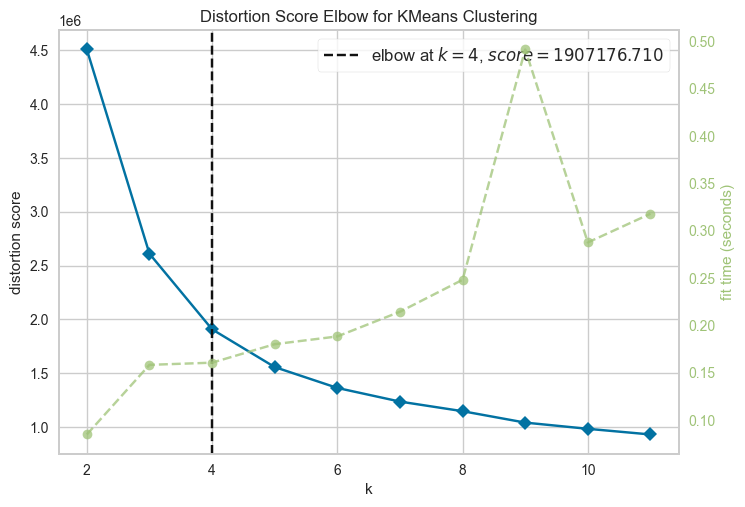

In [1037]:
elbowDist(df)

In [1038]:
def elbowCH(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz')
    elbow.fit(df)
    elbow.show()

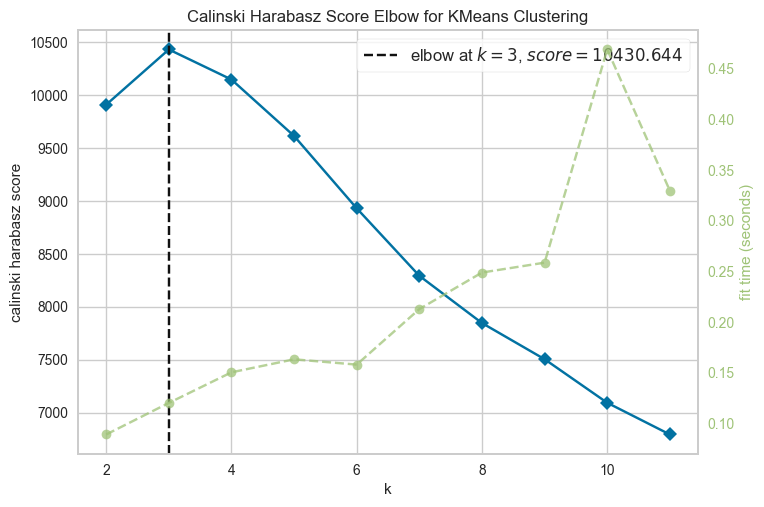

In [1039]:
elbowCH(df)

In [1040]:
def elbowSil(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette')
    elbow.fit(df)
    elbow.show()

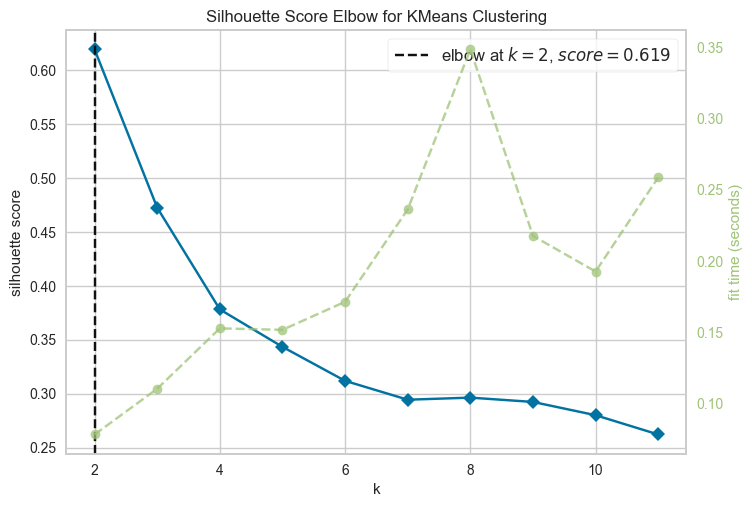

In [1041]:
elbowSil(df)

### PCA predobrada

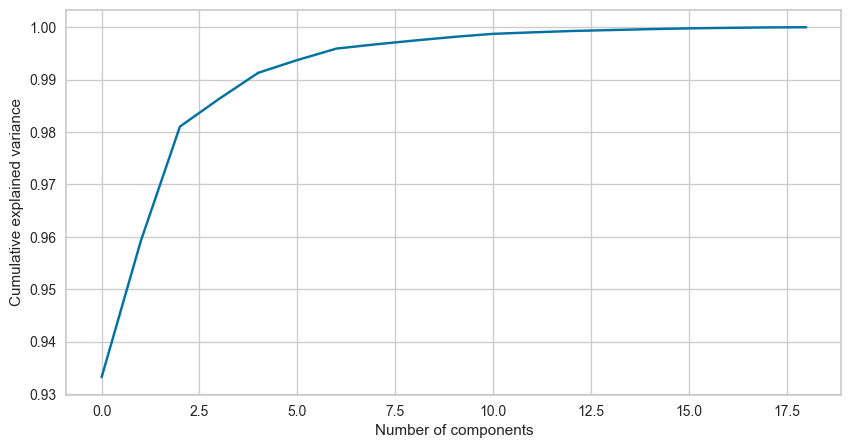

In [1042]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [1060]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

### K-Means Clustering

#### K_Means - 2 klastera

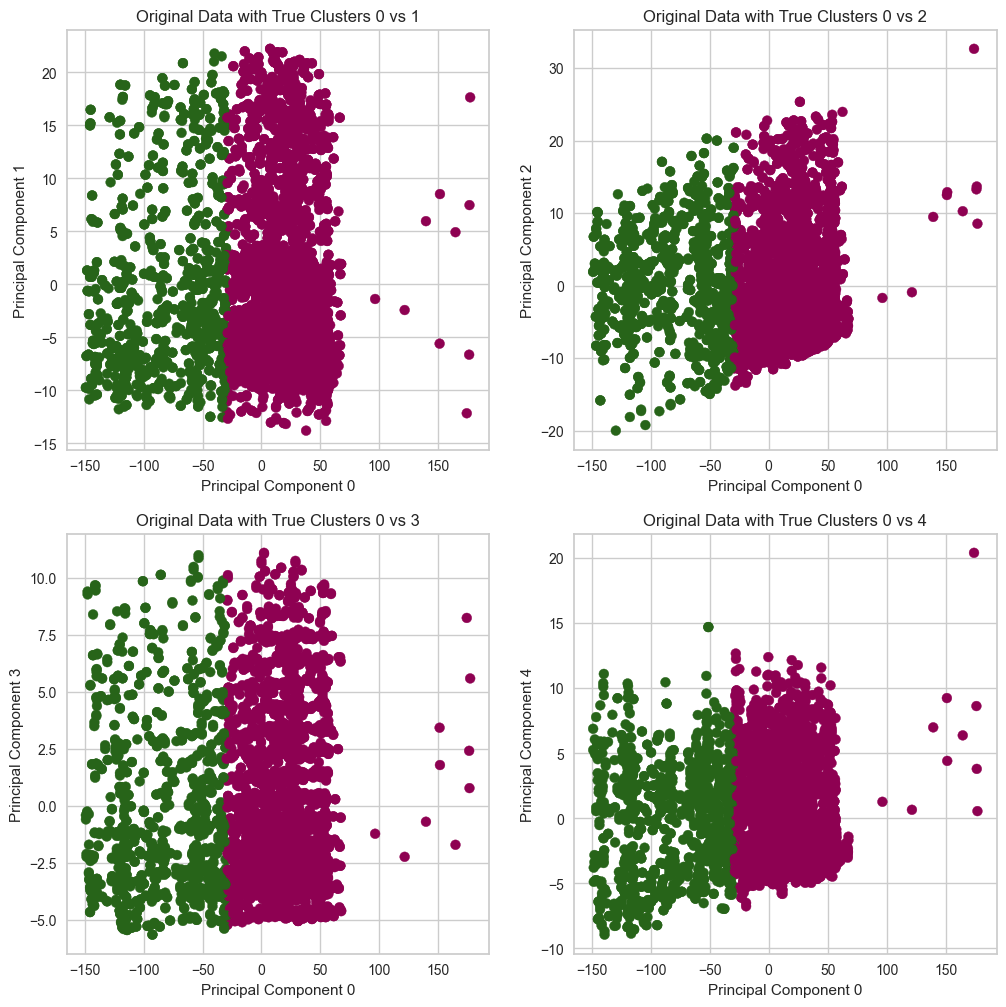

In [1059]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

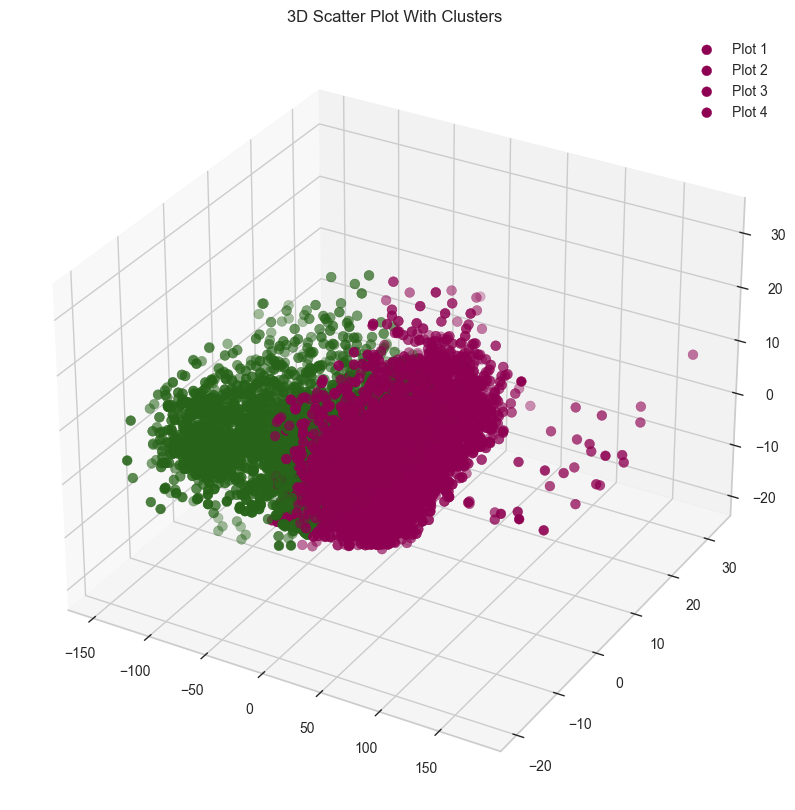

In [1064]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each pair of components
for i, (x, y, z) in enumerate([(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)], 1):
    ax.scatter(X_pca[:, x], X_pca[:, y], X_pca[:, z], c=clusters, cmap='PiYG', s=50, label=f'Plot {i}')

ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

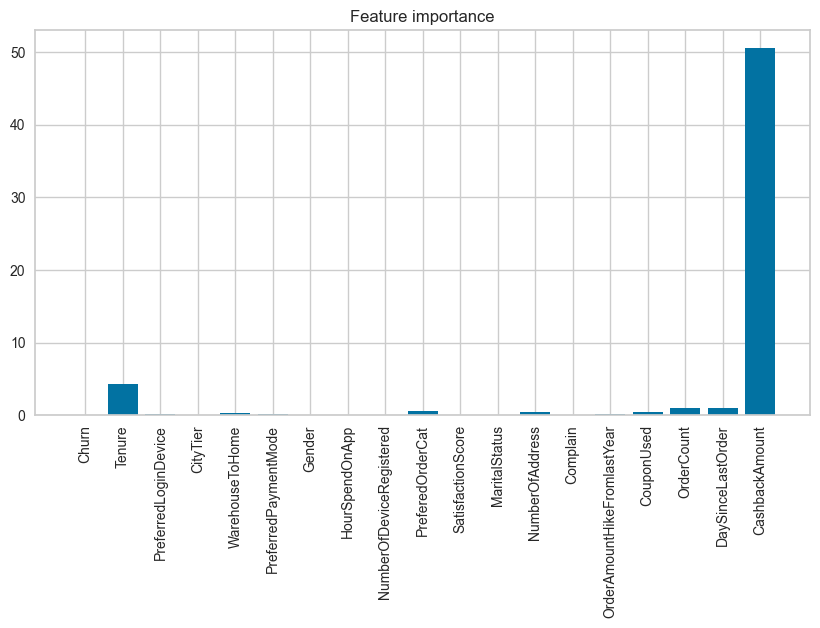

In [1062]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

#### K-Means - 4 klastera

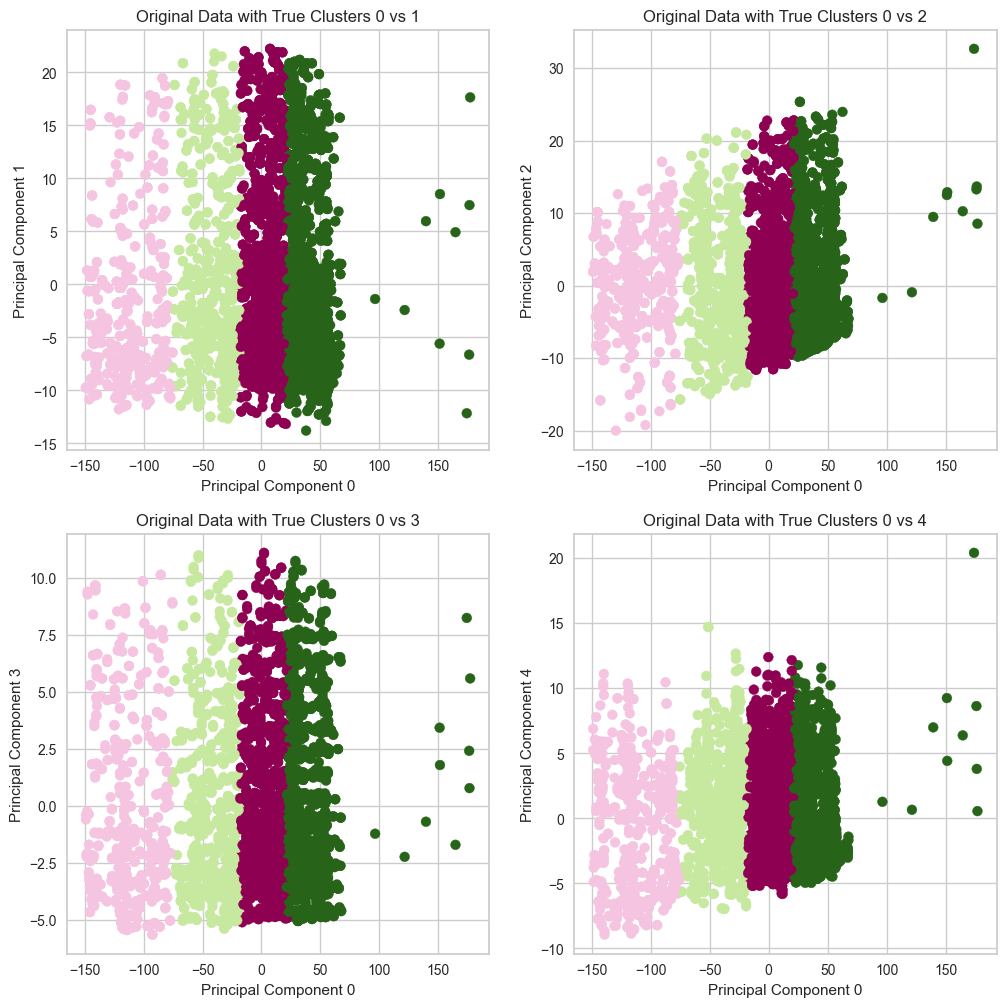

In [1065]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

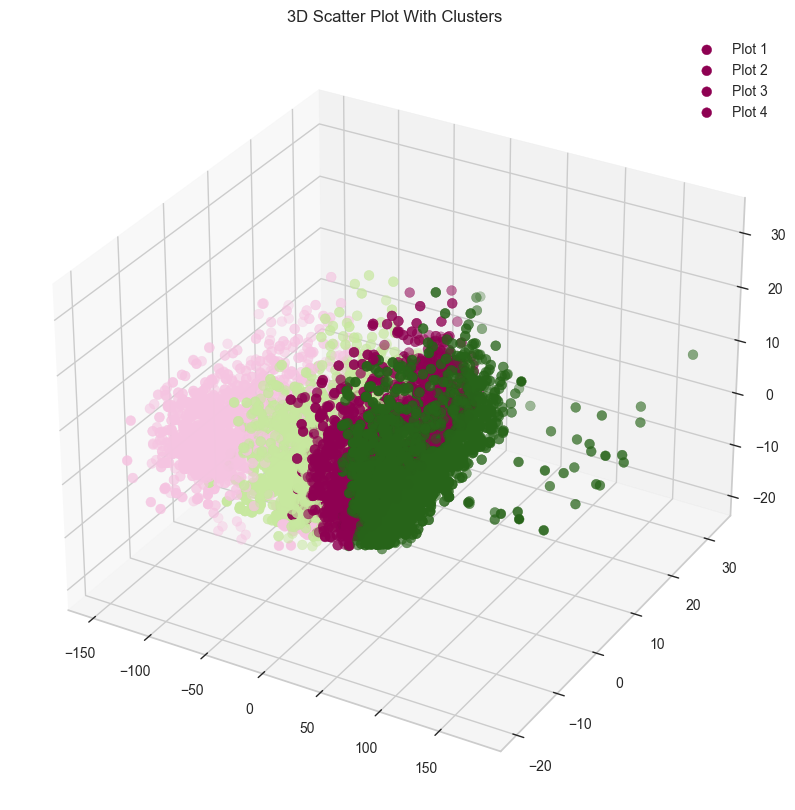

In [1066]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each pair of components
for i, (x, y, z) in enumerate([(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)], 1):
    ax.scatter(X_pca[:, x], X_pca[:, y], X_pca[:, z], c=clusters, cmap='PiYG', s=50, label=f'Plot {i}')

ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

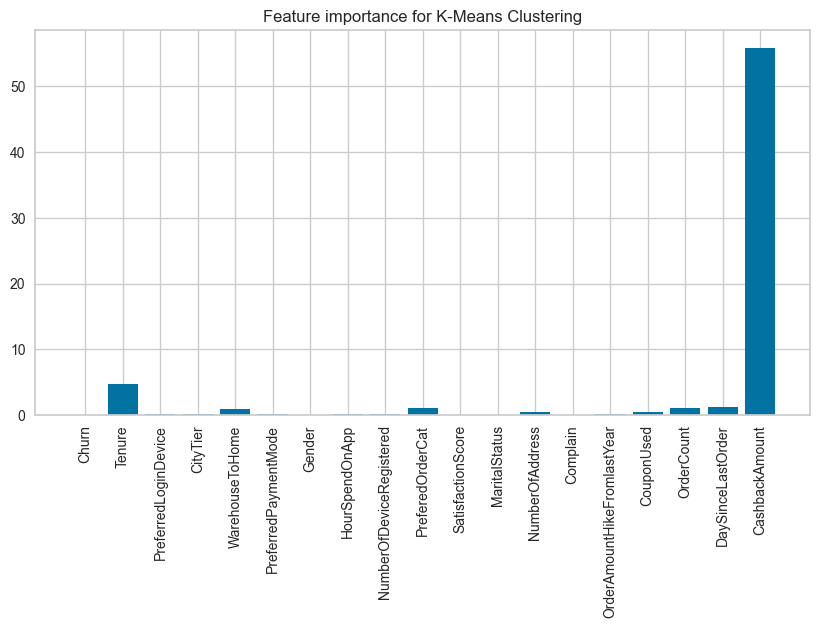

In [1077]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

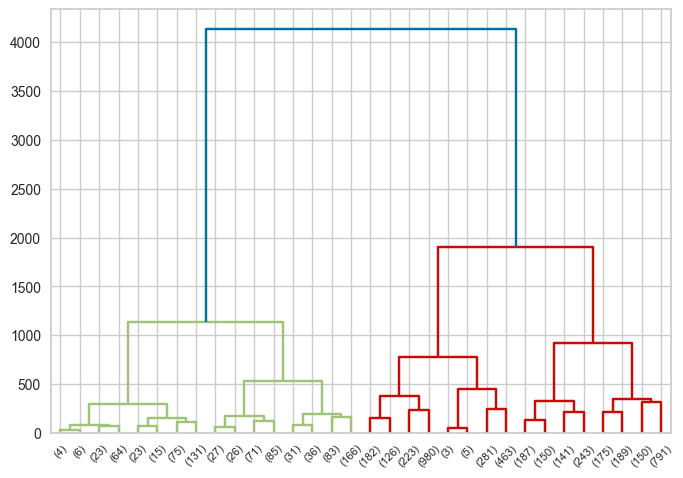

In [1069]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

### Agglomerative Clustering

#### Agglomerative - 2 klastera

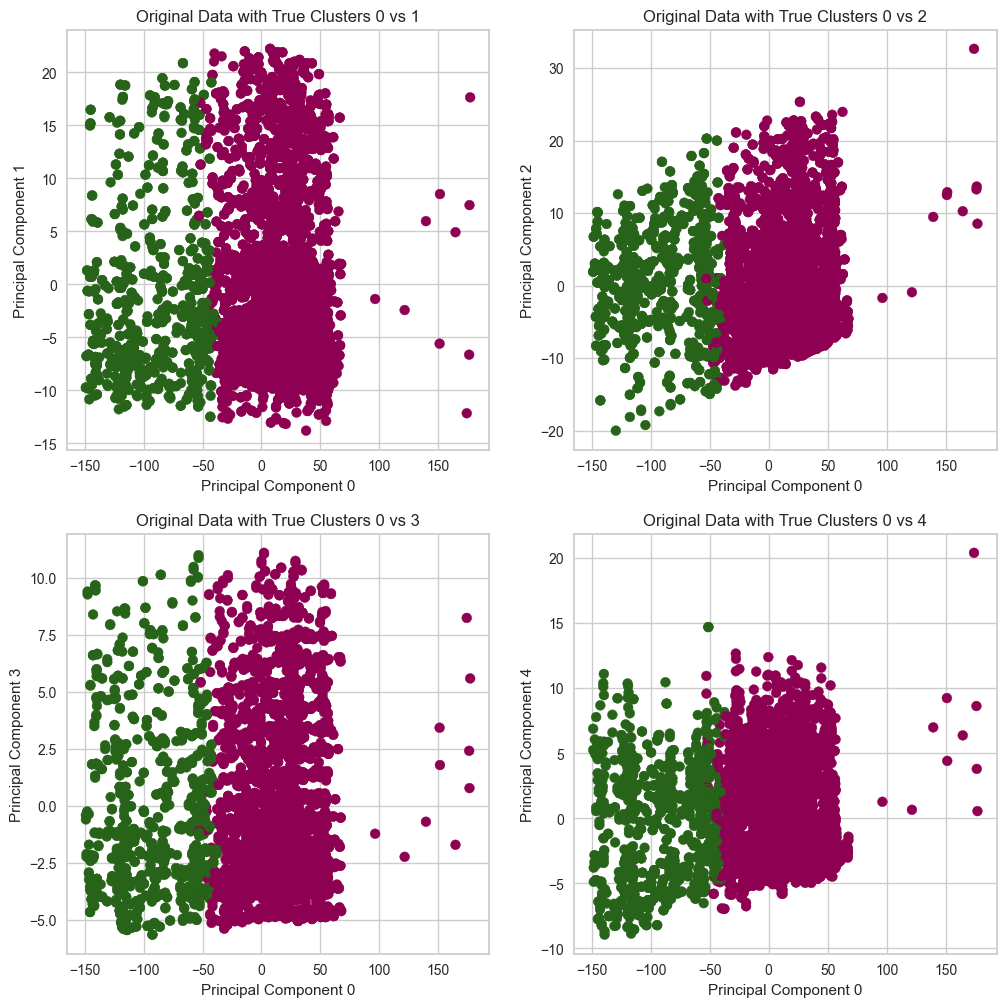

In [1071]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

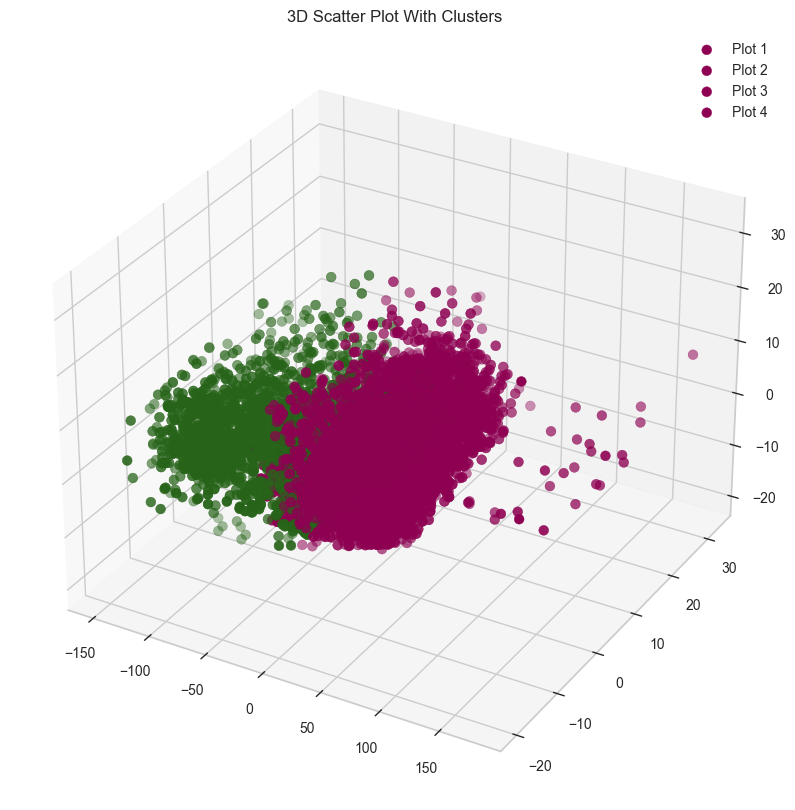

In [1072]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each pair of components
for i, (x, y, z) in enumerate([(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)], 1):
    ax.scatter(X_pca[:, x], X_pca[:, y], X_pca[:, z], c=clusters, cmap='PiYG', s=50, label=f'Plot {i}')

ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

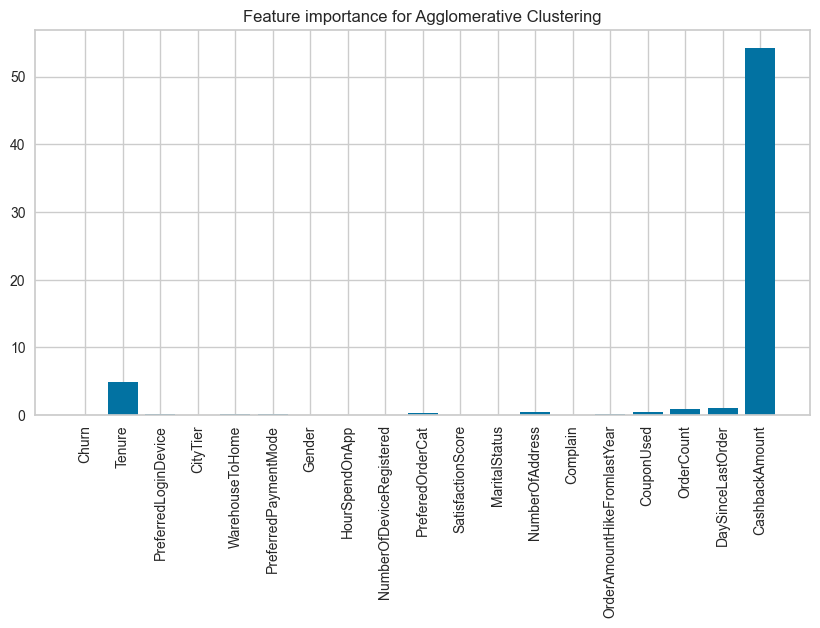

In [1076]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

#### Agglomerative - 4 klastera

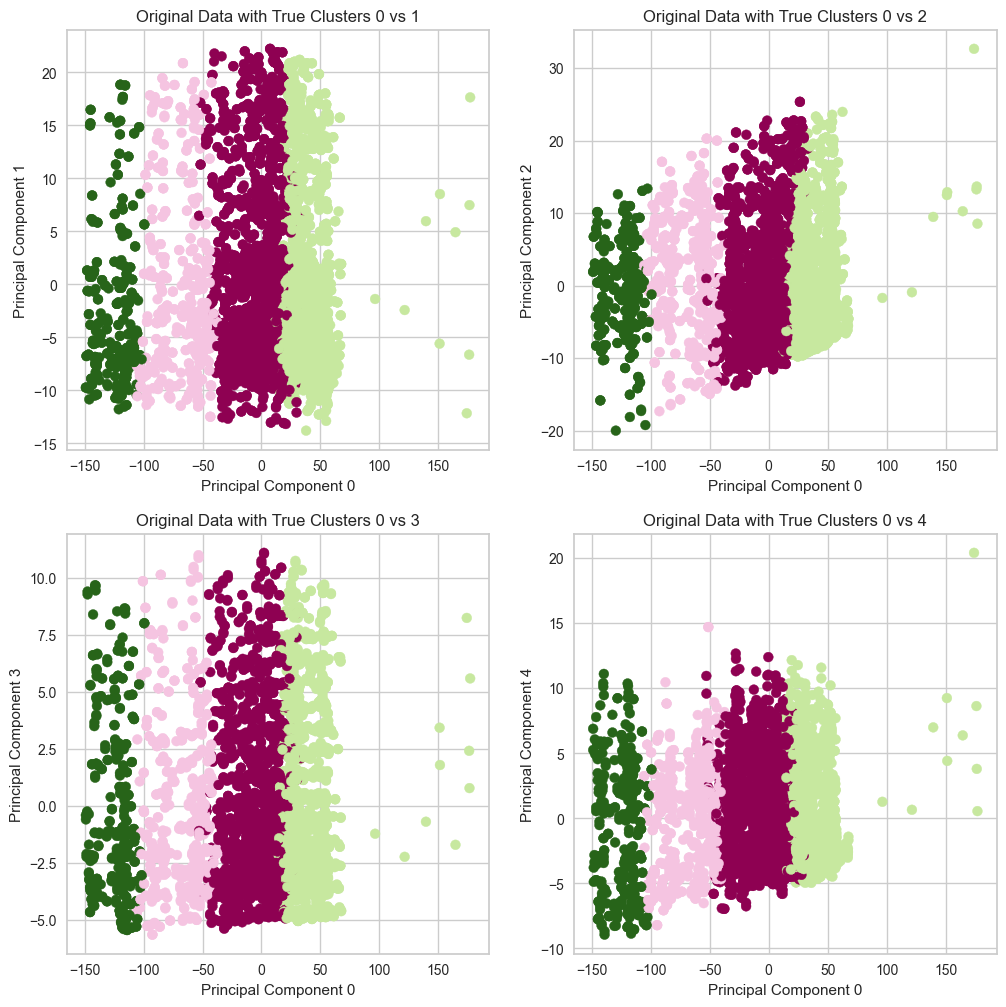

In [1078]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=4)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

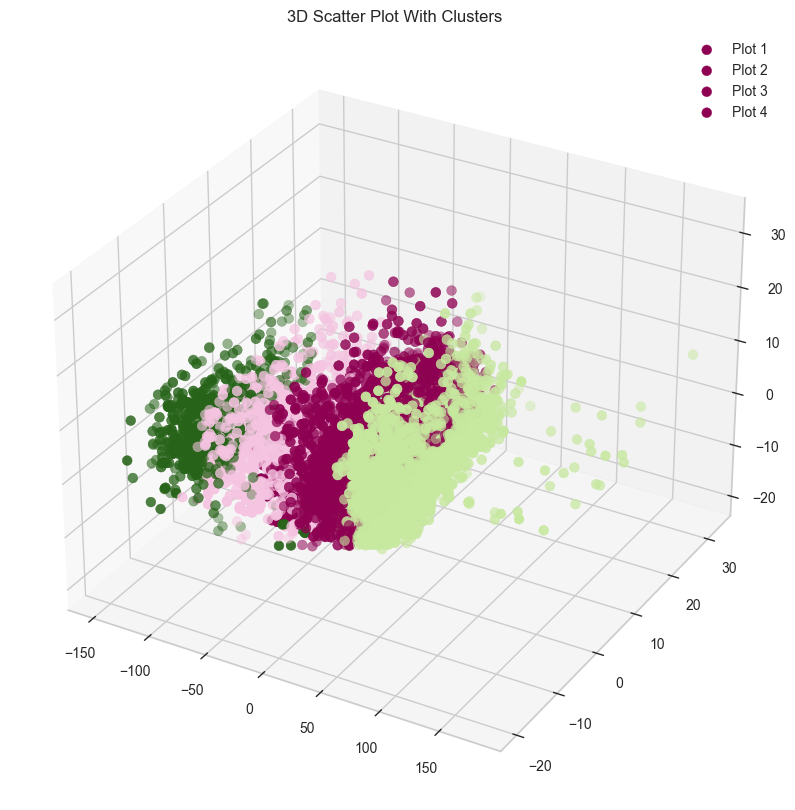

In [1079]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, (x, y, z) in enumerate([(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)], 1):
    ax.scatter(X_pca[:, x], X_pca[:, y], X_pca[:, z], c=clusters, cmap='PiYG', s=50, label=f'Plot {i}')

ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

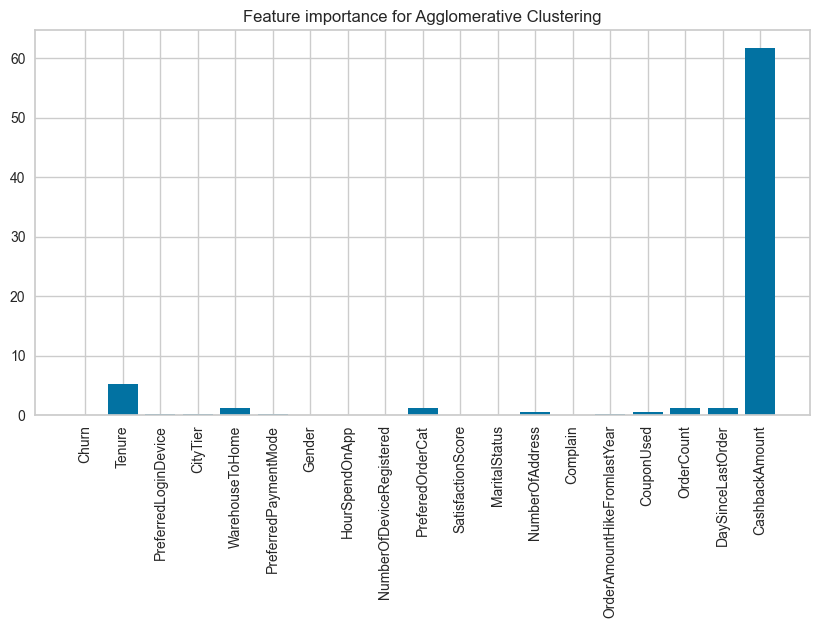

In [1080]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

### DBSCAN

5155


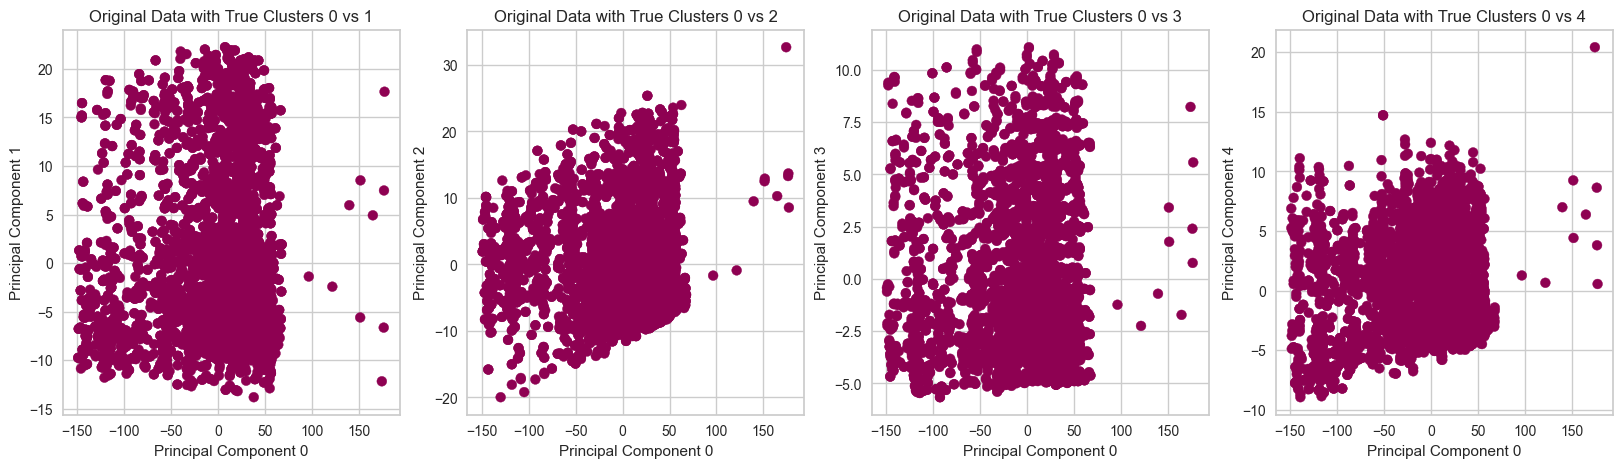

In [1085]:
from sklearn.cluster import DBSCAN

def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

dbscan = DBSCAN(metric=cosine_distance, eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan, cmap='PiYG', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [1086]:
num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

print(f"Number of clusters predicted by DBSCAN: {num_clusters}")

Number of clusters predicted by DBSCAN: 1
